In [1]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import re

In [2]:
page = urlopen("https://www.communitywatercenter.org/news")
soup = BeautifulSoup(page, 'html.parser') #containing the HTML of the page

In [3]:
#soup

In [4]:
name_box = soup.find_all('h3', attrs={'class': 'news_heading'})

In [5]:
#name_box

In [6]:
pagelinks =[]

for count in range(0, len(name_box)):
    for link in name_box[count].find_all('a', href=True):
        pagelinks.append(link['href'])

In [7]:
#pagelinks

In [8]:
soup.find_all("title")

[<title>Water Blog - Community Water Center</title>]

In [9]:
for count in range(0, 1):
    page = urlopen("https://www.communitywatercenter.org" + pagelinks[count])
    soup = BeautifulSoup(page, 'html.parser')

In [10]:
keywords = ['justicia']

In [11]:
if keywords in soup:
    print('yes')
else:
    print('no')

no


In [12]:
#soup

In [13]:
soup.find(string=re.compile("Además"))

# Available Data - Locations with Uncompliant WQ

https://www.waterboards.ca.gov/water_issues/programs/hr2w/index.html

In [14]:
from __future__ import division
import pandas as pd
from datetime import datetime
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
from mpl_toolkits.mplot3d import Axes3D
import pickle
import matplotlib.dates as mdates
import scipy as sy
from scipy.optimize import curve_fit
from geopy.distance import vincenty
from matplotlib import gridspec

carcinogens according to prop 65

https://oehha.ca.gov/proposition-65/proposition-65-list

In [15]:
df_wq = pd.read_csv('hr2w_web_data_active_8_2018.csv', encoding = 'latin1', sep=None)

/usr/local/Cellar/ipython/6.5.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support sep=None with delim_whitespace=False; you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [16]:
df_arsenic = pd.DataFrame()
df_nitrates = pd.DataFrame()
df_carcinogens = pd.DataFrame()

In [17]:
df_arsenic = df_wq[df_wq['ANALYTE_NAME'].str.contains("ARSENIC")]
df_nitrates = df_wq[df_wq['ANALYTE_NAME'].str.contains("NITRATE")]
df_car = pd.read_csv('p65list022518-edited.csv', encoding = 'latin1')
df_car['name'] = df_car['name'].str.upper()
df_carcinogens = df_wq[df_wq['ANALYTE_NAME'].isin(df_car['name'])]

In [18]:
# df_arsenic.to_pickle('arsenic')
# df_nitrates.to_pickle('nitrates')
# df_carcinogens.to_pickle('carcinogens')

In [19]:
# df_arsenic.to_csv('arsenic.csv')
# df_nitrates.to_csv('nitrates.csv')
# df_carcinogens.to_csv('carcinogens.csv')

In [20]:
df_wq['CITY'].str.contains('LAMONT').any()

True

In [21]:
city_served = ['Arvin',
    'Cutler',
    'Ducor',
    'Orosi',
    'Porterville',
    'Lamont',
    'Monson',
    'Poplar',
    'Seville',
    'SULTANA',
    'YETTEM',
    'Goshen']
city_served = [x.upper() for x in city_served]

In [22]:
waterboard_served = [None] * len(city_served)
for i in range(0, len(city_served)):
    waterboard_served[i] = df_wq['CITY'].str.contains(city_served[i]).any()

In [23]:
waterboard_served

[True, False, False, True, True, True, False, True, False, False, False, False]

Cities served by BOTH community water center and CA waterboard: Arvin, Orosi, Porterville, Lamont, Poplar
<br>Cities served ONLY by community water center: Cutler, Ducor, Monson, Seville, Sultana, Yettem, Goshen

In [24]:
df_comcenter = df_wq[df_wq['CITY'].isin(city_served)]

In [25]:
df_comcenter

,ï»¿REGULATING_AGENCY,WATER_SYSTEM_NUMBER,WATER_SYSTEM_NAME,CLASSIFICATION,POPULATION,SERVICE_CONNECTIONS,COUNTY,CITY,ZIPCODE,VIOLATION_NUMBER,VIOLATION_TYPE_NAME,ANALYTE_NAME,RESULT,MCL,VIOL_BEGIN_DATE,VIOL_END_DATE,ENF_ACTION_NUMBER,ENF_ACTION_ISSUE_DATE,ENF_ACTION_TYPE_ISSUED
2069,DISTRICT 12 - VISALIA,CA1510001,ARVIN COMMUNITY SERVICES DIST,COMMUNITY,20850,3885,KERN,ARVIN,93203,1212129,"MCL, AVERAGE",ARSENIC,.03200000 MG/L,0.010 MG/L,1/1/12,3/31/12,US EPA#PWS-AOC-2015-6001,9/29/15,US EPA FEDERAL ADMINSTRATIVE ORDER ON CONSENT
2070,DISTRICT 12 - VISALIA,CA1510001,ARVIN COMMUNITY SERVICES DIST,COMMUNITY,20850,3885,KERN,ARVIN,93203,1212130,"MCL, AVERAGE",ARSENIC,.03170000 MG/L,0.010 MG/L,4/1/12,6/30/12,US EPA#PWS-AOC-2015-6001,9/29/15,US EPA FEDERAL ADMINSTRATIVE ORDER ON CONSENT
2071,DISTRICT 12 - VISALIA,CA1510001,ARVIN COMMUNITY SERVICES DIST,COMMUNITY,20850,3885,KERN,ARVIN,93203,1212131,"MCL, AVERAGE",ARSENIC,.03000000 MG/L,0.010 MG/L,7/1/12,9/30/12,US EPA#PWS-AOC-2015-6001,9/29/15,US EPA FEDERAL ADMINSTRATIVE ORDER ON CONSENT
2072,DISTRICT 12 - VISALIA,CA1510001,ARVIN COMMUNITY SERVICES DIST,COMMUNITY,20850,3885,KERN,ARVIN,93203,9912019,"MCL, AVERAGE",ARSENIC,0.031 MG/L,0.010 MG/L,10/1/12,12/31/12,US EPA#PWS-AOC-2015-6001,9/29/15,US EPA FEDERAL ADMINSTRATIVE ORDER ON CONSENT
2073,DISTRICT 12 - VISALIA,CA1510001,ARVIN COMMUNITY SERVICES DIST,COMMUNITY,20850,3885,KERN,ARVIN,93203,9912021,"MCL, AVERAGE",ARSENIC,0.033 MG/L,0.010 MG/L,1/1/13,3/31/13,US EPA#PWS-AOC-2015-6001,9/29/15,US EPA FEDERAL ADMINSTRATIVE ORDER ON CONSENT
2074,DISTRICT 12 - VISALIA,CA1510001,ARVIN COMMUNITY SERVICES DIST,COMMUNITY,20850,3885,KERN,ARVIN,93203,9912022,"MCL, AVERAGE",ARSENIC,0.033 MG/L,0.010 MG/L,4/1/13,6/30/13,US EPA#PWS-AOC-2015-6001,9/29/15,US EPA FEDERAL ADMINSTRATIVE ORDER ON CONSENT
2075,DISTRICT 12 - VISALIA,CA1510001,ARVIN COMMUNITY SERVICES DIST,COMMUNITY,20850,3885,KERN,ARVIN,93203,9912023,"MCL, AVERAGE",ARSENIC,0.034 MG/L,0.010 MG/L,7/1/13,9/30/13,US EPA#PWS-AOC-2015-6001,9/29/15,US EPA FEDERAL ADMINSTRATIVE ORDER ON CONSENT
2076,DISTRICT 12 - VISALIA,CA1510001,ARVIN COMMUNITY SERVICES DIST,COMMUNITY,20850,3885,KERN,ARVIN,93203,9912024,"MCL, AVERAGE",ARSENIC,0.033 MG/L,0.010 MG/L,10/1/13,12/31/13,US EPA#PWS-AOC-2015-6001,9/29/15,US EPA FEDERAL ADMINSTRATIVE ORDER ON CONSENT
2077,DISTRICT 12 - VISALIA,CA1510001,ARVIN COMMUNITY SERVICES DIST,COMMUNITY,20850,3885,KERN,ARVIN,93203,9912026,"MCL, AVERAGE",ARSENIC,0.033 MG/L,0.010 MG/L,1/1/14,3/31/14,US EPA#PWS-AOC-2015-6001,9/29/15,US EPA FEDERAL ADMINSTRATIVE ORDER ON CONSENT
2078,DISTRICT 12 - VISALIA,CA1510001,ARVIN COMMUNITY SERVICES DIST,COMMUNITY,20850,3885,KERN,ARVIN,93203,9912027,"MCL, AVERAGE",ARSENIC,0.032 MG/L,0.010 MG/L,4/1/14,6/30/14,US EPA#PWS-AOC-2015-6001,9/29/15,US EPA FEDERAL ADMINSTRATIVE ORDER ON CONSENT


In [26]:
df_comcenter['VIOL_BEGIN_DT'] = pd.to_datetime(df_comcenter['VIOL_BEGIN_DATE'], format="%m/%d/%y")
df_comcenter['VIOL_END_DT'] = pd.to_datetime(df_comcenter['VIOL_END_DATE'], format="%m/%d/%y")

/usr/local/Cellar/ipython/6.5.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/Cellar/ipython/6.5.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [27]:
d1 = df_comcenter['VIOL_BEGIN_DT'].min()
d2 = df_comcenter['VIOL_BEGIN_DT'].max()

In [28]:
comdates = []
delta = d2 - d1         # timedelta

for i in range(delta.days + 1):
    comdates.append(d1 + datetime.timedelta(i))

In [29]:
comcenter = pd.DataFrame()
comcenter['dt'] = comdates
comcenter['count'] = 0

In [30]:
# for ind in range(0, len(df_comcenter)):
#     d1 = df_comcenter['VIOL_BEGIN_DT'].iloc[ind]
#     d3 = df_comcenter['VIOL_END_DT'].iloc[ind]
#     for i in range(0, len(comcenter)):
#         if d1 <= comcenter['dt'].iloc[i] <= d3:
#             comcenter['count'].iloc[i] = comcenter['count'].iloc[i] + 1

In [31]:
#comcenter.to_pickle('comcenter')

In [32]:
comcenter = pd.read_pickle('comcenter')

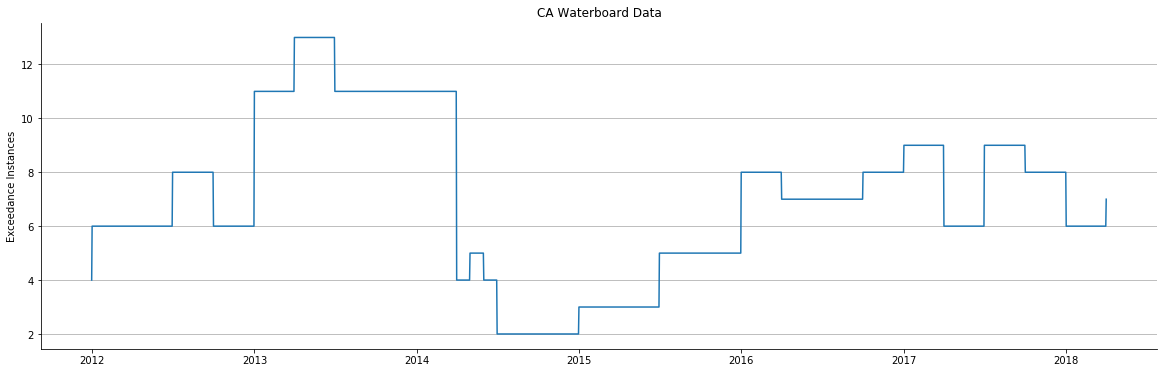

In [33]:
f, ax = plt.subplots(figsize=(20,6))
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left() 
ax.plot(comcenter['dt'], comcenter['count'])

ax.set_title('CA Waterboard Data')
ax.set_ylabel('Exceedance Instances')
ax.yaxis.grid()

#savefig('waterboard-line.png')

In [34]:
comcenter_city = pd.DataFrame()
comcenter_city['dt'] = comdates
comcenter_city['ARVIN'] = 0
comcenter_city['OROSI'] = 0
comcenter_city['PORTERVILLE'] = 0
comcenter_city['LAMONT'] = 0
comcenter_city['POPLAR'] = 0

In [35]:
# for ind in range(0, len(df_comcenter)):
#     d1 = df_comcenter['VIOL_BEGIN_DT'].iloc[ind]
#     d3 = df_comcenter['VIOL_END_DT'].iloc[ind]
#     tempcity = df_comcenter['CITY'].iloc[ind]
#     for i in range(0, len(comcenter_city)):
#         if d1 <= comcenter_city['dt'].iloc[i] <= d3:
#             comcenter_city[tempcity].iloc[i] = comcenter_city[tempcity].iloc[i] + 1

In [36]:
#comcenter_city.to_pickle('comcenter_city')

In [37]:
comcenter_city = pd.read_pickle('comcenter_city')

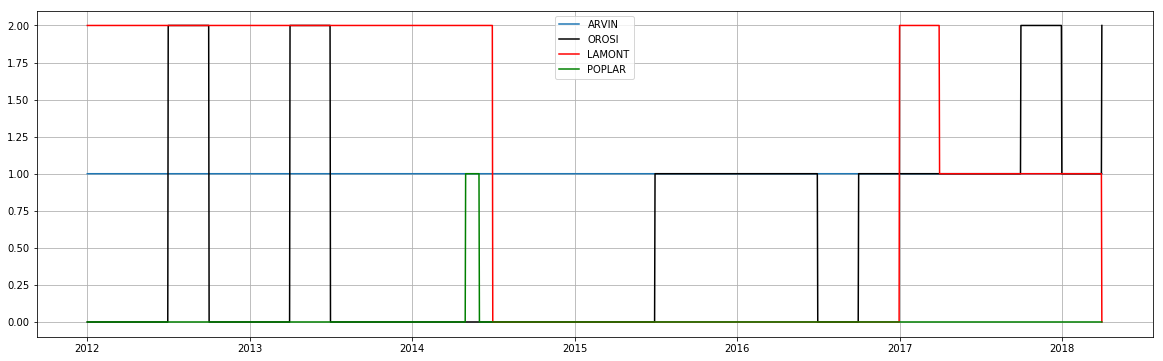

In [38]:
f, ax = plt.subplots(figsize=(20,6))
ax.plot(comcenter_city['dt'], comcenter_city['ARVIN'])
ax.plot(comcenter_city['dt'], comcenter_city['OROSI'], color = 'k')
ax.plot(comcenter_city['dt'], comcenter_city['LAMONT'], color = 'red')
ax.plot(comcenter_city['dt'], comcenter_city['POPLAR'], color = 'green')
ax.grid()
ax.legend();

Text(0,0.5,'Exceedance Instances')

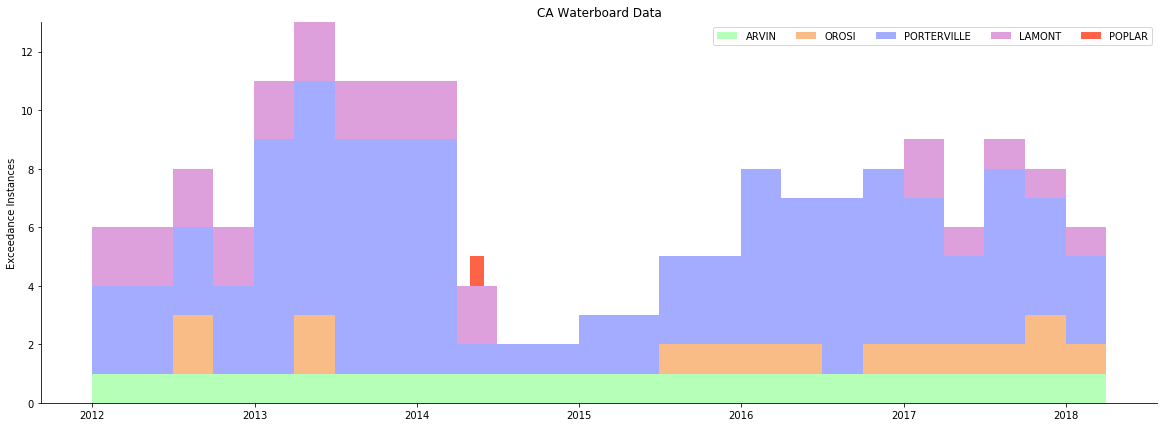

In [39]:
f, ax = plt.subplots(figsize=(20,7))
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left() 

ax.bar(comcenter_city['dt'].values.astype('datetime64[D]'), comcenter_city['ARVIN'], color='#b5ffb9', width = 1, label="ARVIN")
ax.bar(comcenter_city['dt'].values.astype('datetime64[D]'), comcenter_city['OROSI'], bottom=comcenter_city['ARVIN'], color='#f9bc86', width = 1, label="OROSI")
ax.bar(comcenter_city['dt'].values.astype('datetime64[D]'), comcenter_city['PORTERVILLE'], bottom=[i+j for i,j in zip(comcenter_city['ARVIN'], comcenter_city['OROSI'])], color='#a3acff', width = 1, label="PORTERVILLE")
ax.bar(comcenter_city['dt'].values.astype('datetime64[D]'), comcenter_city['LAMONT'], bottom=[i+j+k for i,j,k in zip(comcenter_city['ARVIN'], comcenter_city['OROSI'], comcenter_city['PORTERVILLE'])], color='plum', width = 1, label="LAMONT")
ax.bar(comcenter_city['dt'].values.astype('datetime64[D]'), comcenter_city['POPLAR'], bottom=[i+j+k+l for i,j,k,l in zip(comcenter_city['ARVIN'], comcenter_city['OROSI'], comcenter_city['PORTERVILLE'], comcenter_city['LAMONT'])], color='tomato', width = 1, label="POPLAR")

ax.legend(ncol = 5)
ax.set_title('CA Waterboard Data')
ax.set_ylabel('Exceedance Instances')

#savefig('waterboard-city.png')

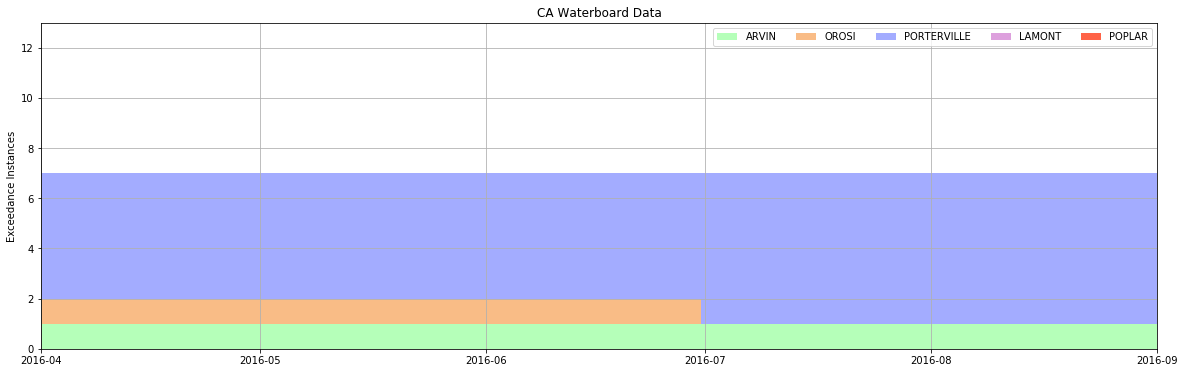

In [40]:
f, ax = plt.subplots(figsize=(20,6))

ax.bar(comcenter_city['dt'].values.astype('datetime64[D]'), comcenter_city['ARVIN'], color='#b5ffb9', width = 1, label="ARVIN")
ax.bar(comcenter_city['dt'].values.astype('datetime64[D]'), comcenter_city['OROSI'], bottom=comcenter_city['ARVIN'], color='#f9bc86', width = 1, label="OROSI")
ax.bar(comcenter_city['dt'].values.astype('datetime64[D]'), comcenter_city['PORTERVILLE'], bottom=[i+j for i,j in zip(comcenter_city['ARVIN'], comcenter_city['OROSI'])], color='#a3acff', width = 1, label="PORTERVILLE")
ax.bar(comcenter_city['dt'].values.astype('datetime64[D]'), comcenter_city['LAMONT'], bottom=[i+j+k for i,j,k in zip(comcenter_city['ARVIN'], comcenter_city['OROSI'], comcenter_city['PORTERVILLE'])], color='plum', width = 1, label="LAMONT")
ax.bar(comcenter_city['dt'].values.astype('datetime64[D]'), comcenter_city['POPLAR'], bottom=[i+j+k+l for i,j,k,l in zip(comcenter_city['ARVIN'], comcenter_city['OROSI'], comcenter_city['PORTERVILLE'], comcenter_city['LAMONT'])], color='tomato', width = 1, label="POPLAR")

ax.legend(ncol = 5)
ax.set_xlim([datetime.datetime(2016, 4, 1), datetime.datetime(2016, 9, 1)])
ax.set_title('CA Waterboard Data')
ax.set_ylabel('Exceedance Instances')
ax.grid()

#savefig('waterboard-city-cut.png')